In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D

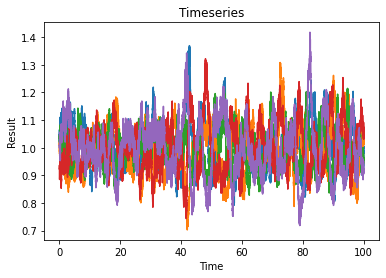

In [12]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 1

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting, pertuSetting, timestep_ = 0.001)
TS.generate()
TS.plot(0)
fitObj = fitGLV(TS)
fitObj.computeNullHypo()

In [10]:
np.sqrt(0.1)

0.31622776601683794

In [14]:
np.sqrt(fitObj.varEst[0])

array([3.15291806, 3.1533954 , 3.16634737, 3.15897205, 3.16421391])

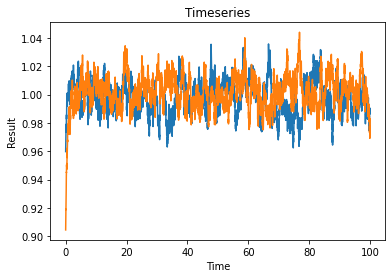

In [5]:
TS.plot(0)

--------
# Investigation why invalid matrixes can still generate the expected data. 

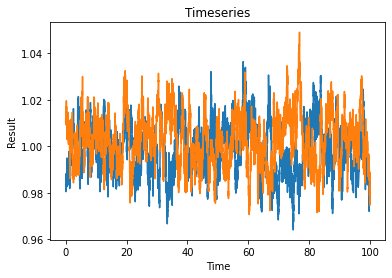

In [3]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 1

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(0)# Plot the zeroth experiment.

In [30]:
fitObj = fitGLV(TS)
fitObj.trueMat

array([[[ 1.72074965,  2.68017964],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

In [8]:
TS.beta

array([[[ 2.397978  ,  2.00295129],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

In [14]:
InterMat = TS.interactionMatrix[0]

In [11]:
steady = np.array([1,1])

In [16]:
growth = TS.growth[0]

In [17]:
steady * growth + steady * np.dot(InterMat,steady)

array([0., 0.])

In [19]:
steady@InterMat

array([-1.72074965, -2.68017964])

In [23]:
TS.steadystate

array([1., 1.])

In [24]:
InterMat@steady

array([-2.397978  , -2.00295129])

In [26]:
steady@InterMat

array([-1.72074965, -2.68017964])

In [ ]:
-1.50380

-------------
Great now lets implement the good inference with pertubation.

In [36]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 10,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 1

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()

(1, 9990, 2)
(1, 9990, 3)


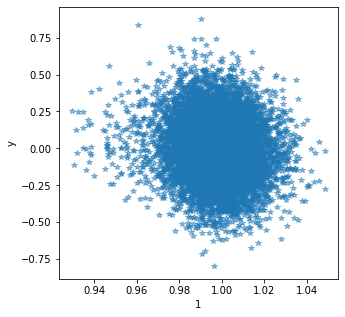

In [40]:
fitObj = fitGLV(TS)
plot2DScatter(fitObj.Y,fitObj.X,xaxis="1",yaxis="y")
print(fitObj.Y.shape)
print(fitObj.X.shape)

You see this is the effect if we do not exclude the wrong Y entries.

In [11]:
np.all(np.zeros(4)==0)

True

In [10]:
np.zeros(4)==1

array([False, False, False, False])

In [16]:
np.where(TS.hasPertuberd)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999]))

In [18]:
save = np.random.rand(3,4)
save

array([[0.78858913, 0.41071617, 0.79593148, 0.59876565],
       [0.00385421, 0.14339409, 0.86693316, 0.67121937],
       [0.30198136, 0.76892117, 0.52320695, 0.35695767]])

In [22]:
bool = np.array([[False,True,False,True],[False,True,False,True],[False,True,False,True]])
save[bool]

array([0.41071617, 0.59876565, 0.14339409, 0.67121937, 0.76892117,
       0.35695767])

In [32]:
testBool = np.array([False,True,False,True])

In [33]:
save[:,~testBool]

array([[0.78858913, 0.79593148],
       [0.00385421, 0.86693316],
       [0.30198136, 0.52320695]])

In [42]:
fitObj.trueMat

array([[[ 1.72074965,  2.68017964],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

-----
Why zero interaction explodes?

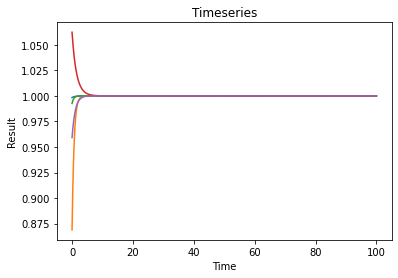

In [48]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.00001
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 0}

numberSpecies = 5
numberExperiments = 100

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(0)

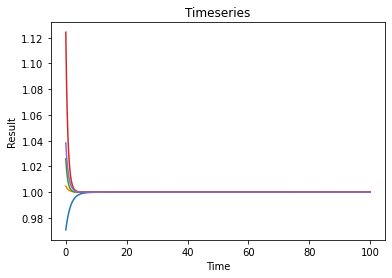

In [51]:
TS.plot(7)

-------

In [3]:
# Have it again just so the code is close by. 
expoNoise = np.arange(-5,-0,0.5)
noises = np.power(10,expoNoise)
expoInteraction = np.arange(-4.5,0.5,0.5)
interactions = np.power(10,expoInteraction)
pertubations = np.array([10000,20,2])
subSampleSteps = np.array([1,2,3,4,5,7,9,11,13,15,20,25,30,35,40,60,80,100,120,140])

In [4]:
def plotSubSampMatrix(variable = "percent",section="I", stepSamples = (1,2,3), Self = False):
    # Load wanted data
    if variable == "numberOfGoodExp":
        path = "numberOfGoodExp.npy"
    else:
        path = "MEDIAN"+variable+section+".npy"
    if Self:
        path = "Self_" +  path
    medianData = np.load("DataStorage/SubSampleBis/"+path)
    
    fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(15,15))
    fig.suptitle(f"Median {variable}{section} subsampled", fontsize=22)
        
    #loop over the axes
    
    for row, axs_row  in enumerate(axs):
        
        for column, ax in enumerate(axs_row):
            # create labels
            if row==0:# The top row
                ax.set_title(f"stepSamples = {stepSamples[column]}",fontsize=15)
            if column==0: # The right side
                ax.set_ylabel(f"period = {pertubations[row]}",fontsize=15)
            
            l = np.where(subSampleSteps==stepSamples[column])[0][0] # get back the correct index
            
            # Plot the data
            if variable=="percent":
                im = ax.matshow(medianData[row,:,:,l],cmap="jet",vmin=0, vmax=1)
            elif variable == "numberOfGoodExp":
                im = ax.matshow(medianData[row]/50,cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(medianData[row,:,:,l],cmap="jet",vmin=0, vmax=6)
            
    
    # Tick lables for some weird reason have to be done this way :/ 
    rightSideAxes = (axs[0][0],axs[1][0],axs[2][0])
    lowerSideAxes = (axs[2][0],axs[2][1],axs[2][2])
    topSideAxes = (axs[0][0],axs[0][1],axs[0][2])
    for ax in rightSideAxes:
        ax.set_yticks(np.arange(len(expoNoise)))
        ax.set_yticklabels(labels=expoNoise)
    for ax in lowerSideAxes:
        ax.set_xticks(np.arange(len(expoInteraction)))
        ax.set_xticklabels(labels=expoInteraction)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
    for ax in topSideAxes:
        pass
        #ax.set_xticks(np.arange(7))
        #ax.set_xticklabels(labels=interStength)
        #ax.tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)
    # Add color bar
    cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label(variable,fontsize=15)
    # Add x and Y label
    fig.text(0.5,0.1, "Log. Interaction strenght", ha="center", va="center",fontsize=17)
    fig.text(0.07,0.5, "Log. noise strenght", ha="center", va="center", rotation=90,fontsize=17)  
    # adjust space between pltos
    
    plt.subplots_adjust( wspace=0, hspace=0.02)
        

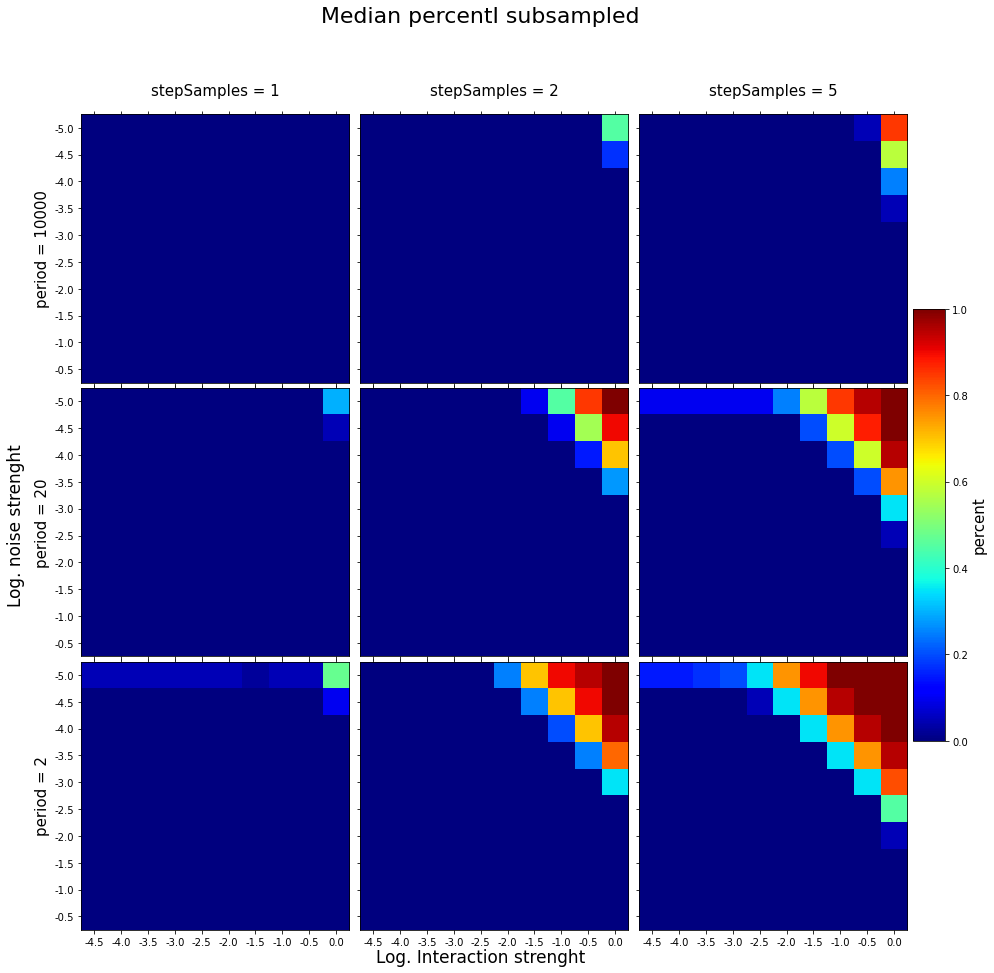

In [6]:
plotSubSampMatrix("percent","I",stepSamples=(1,2,5),Self=True)

In [7]:
pow(10,-0.5)

0.31622776601683794

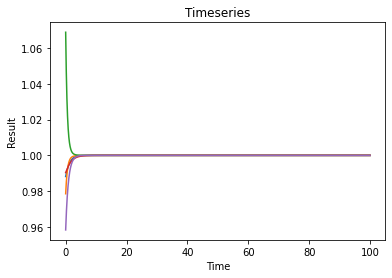

In [85]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0
}
pertuSetting = {
    "period" : 100,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : pow(10,-1)}

numberSpecies = 5
numberExperiments = 4

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.01)
TS.generate()
TS.plot(0)

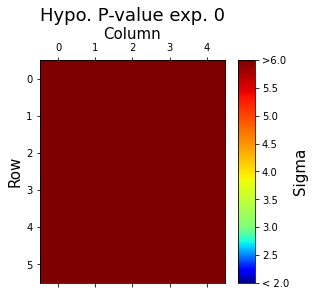

In [87]:
fitObj = fitGLV(TS )
out = fitObj.hypo(fitObj.trueMat,plotNumb=0)

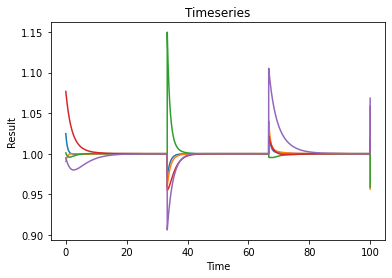

In [76]:
TS.plot(2)

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/helpFunctions.py:26: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  dnorm = matplotlib.colors.DivergingNorm(vmin=vmin,vcenter=vcenter,vmax=vmax)


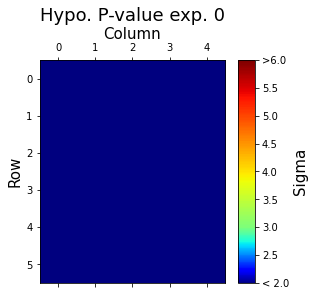

In [ ]:
fit